<a href="https://colab.research.google.com/github/amss11258/Netflix-capstone-project/blob/main/Netflix_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NETFLIX CAPSTONE PROJECT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#Data Exploration

In [2]:
#Loading dataset

df =pd.read_csv("/content/netflix_titles.csv")

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape

(8807, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


#Data Cleaning

In [9]:
df = df.drop_duplicates()

In [10]:
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df = df.dropna(subset=['date_added', 'rating'])

In [11]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,NaN,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,NaN,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [12]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,NaN,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


#Descriptive Statistics:

In [13]:
print(df['release_year'].describe())

count    8793.000000
mean     2014.183100
std         8.824128
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


#Data Visualization part - 1

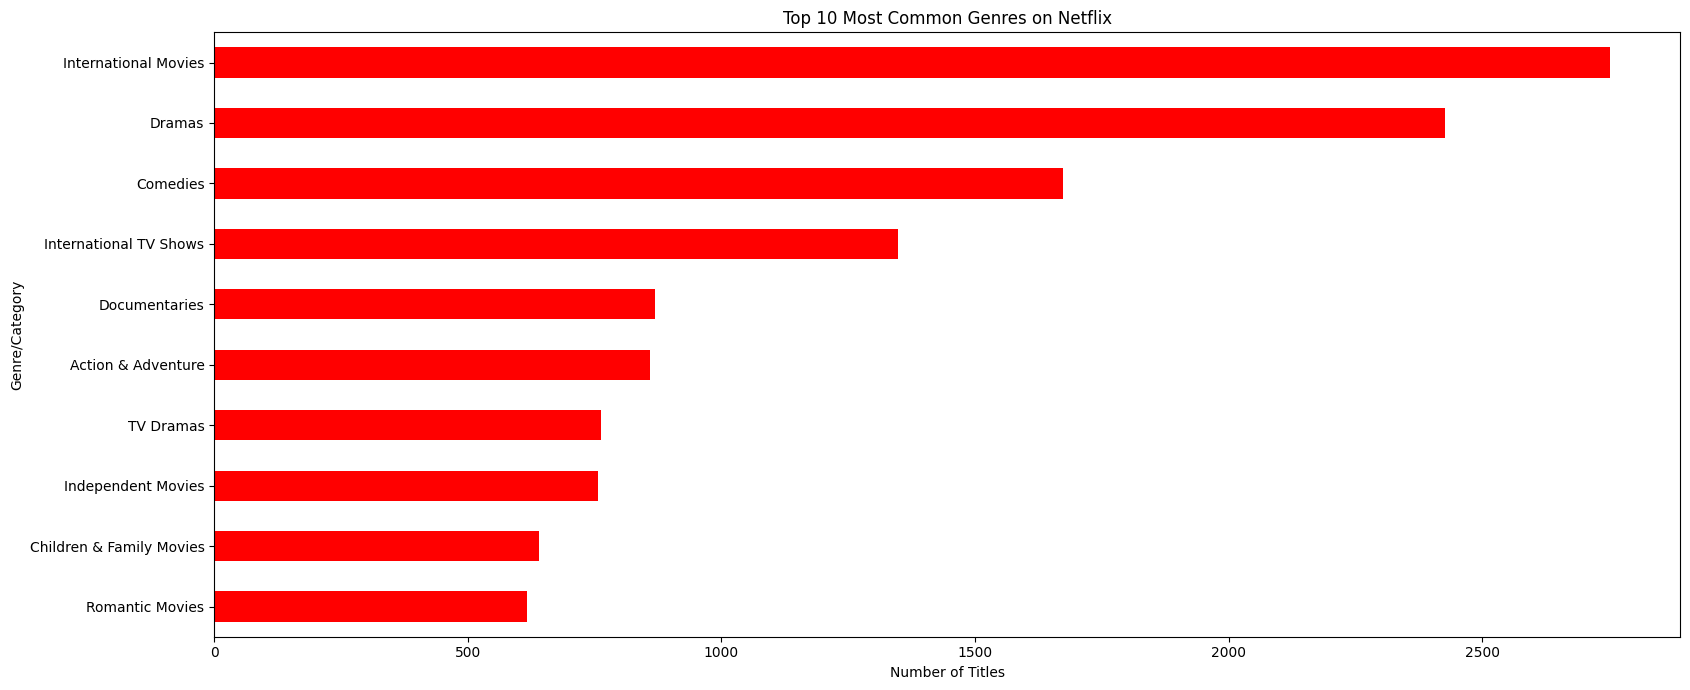

In [14]:
df['listed_in'].dropna().str.split(',').explode().str.strip().value_counts().head(10).plot(kind='barh', figsize =(17,7), color='Red')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre/Category')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Data Visualization part - 2

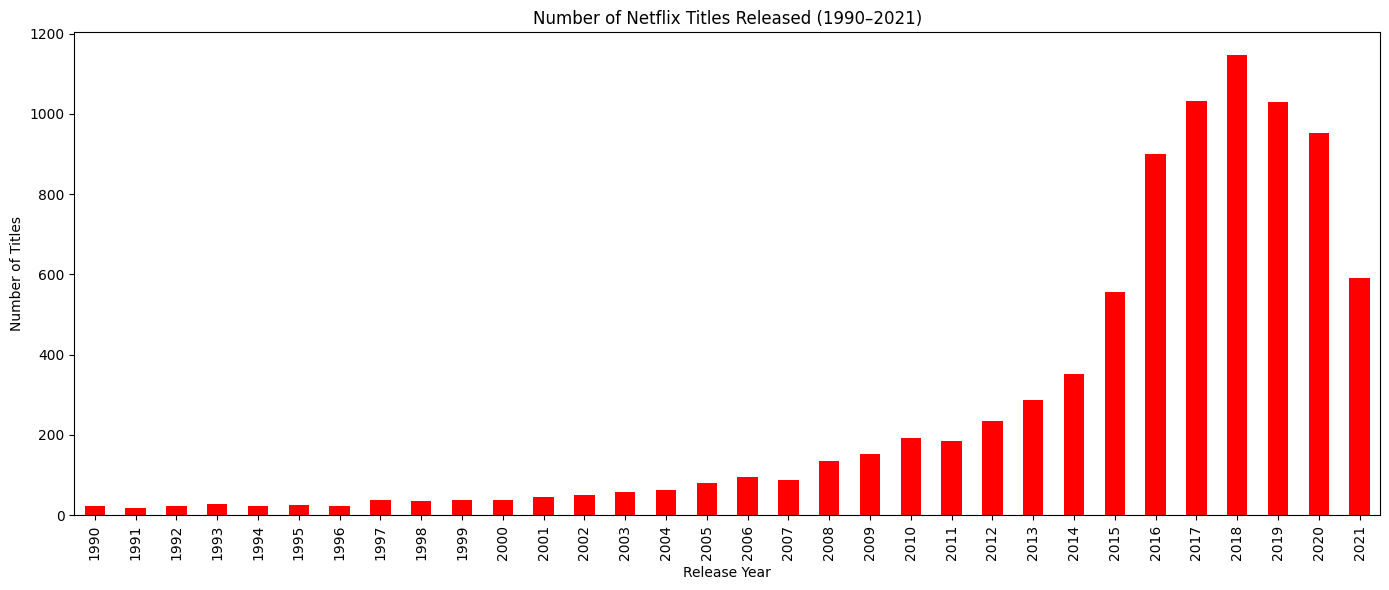

In [15]:
import matplotlib.pyplot as plt

# Filter and plot data for years between 1971 and 2021
year_counts = df['release_year'].value_counts().sort_index()
year_counts = year_counts[(year_counts.index >= 1990) & (year_counts.index <= 2021)]

year_counts.plot(kind='bar', figsize=(14, 6), color='Red')
plt.title('Number of Netflix Titles Released (1990–2021)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


#Data Visualization part - 3

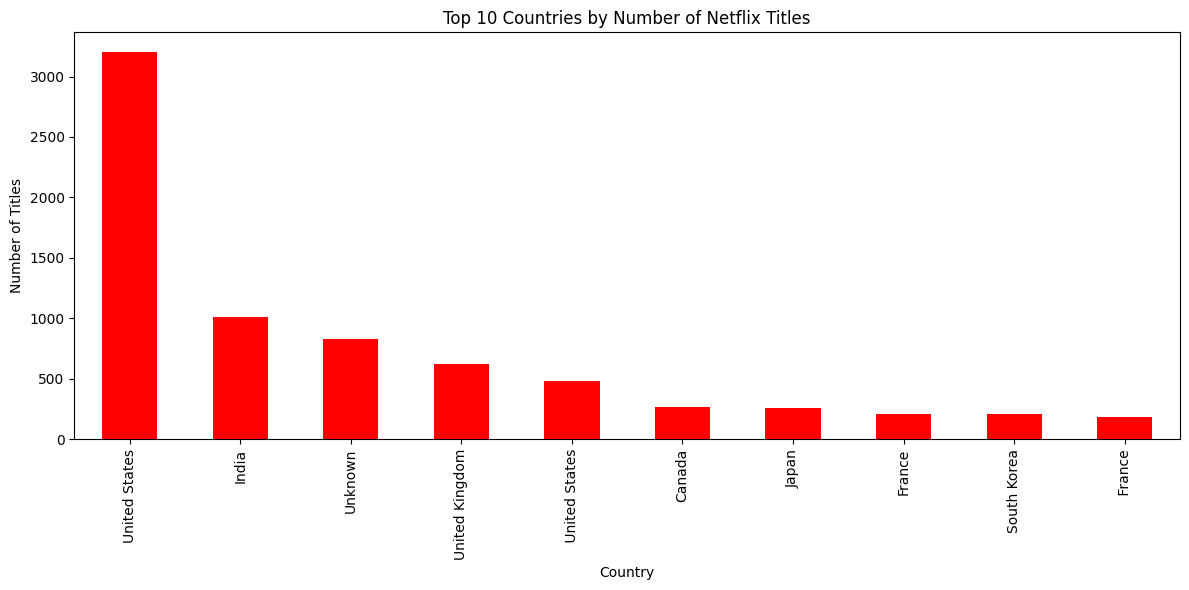

In [16]:
df['country'].dropna().str.split(',').explode().value_counts().head(10).plot(
    kind='bar', figsize=(12, 6), color='Red'
)
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.tight_layout()
plt.show()


#Time Series Analysis

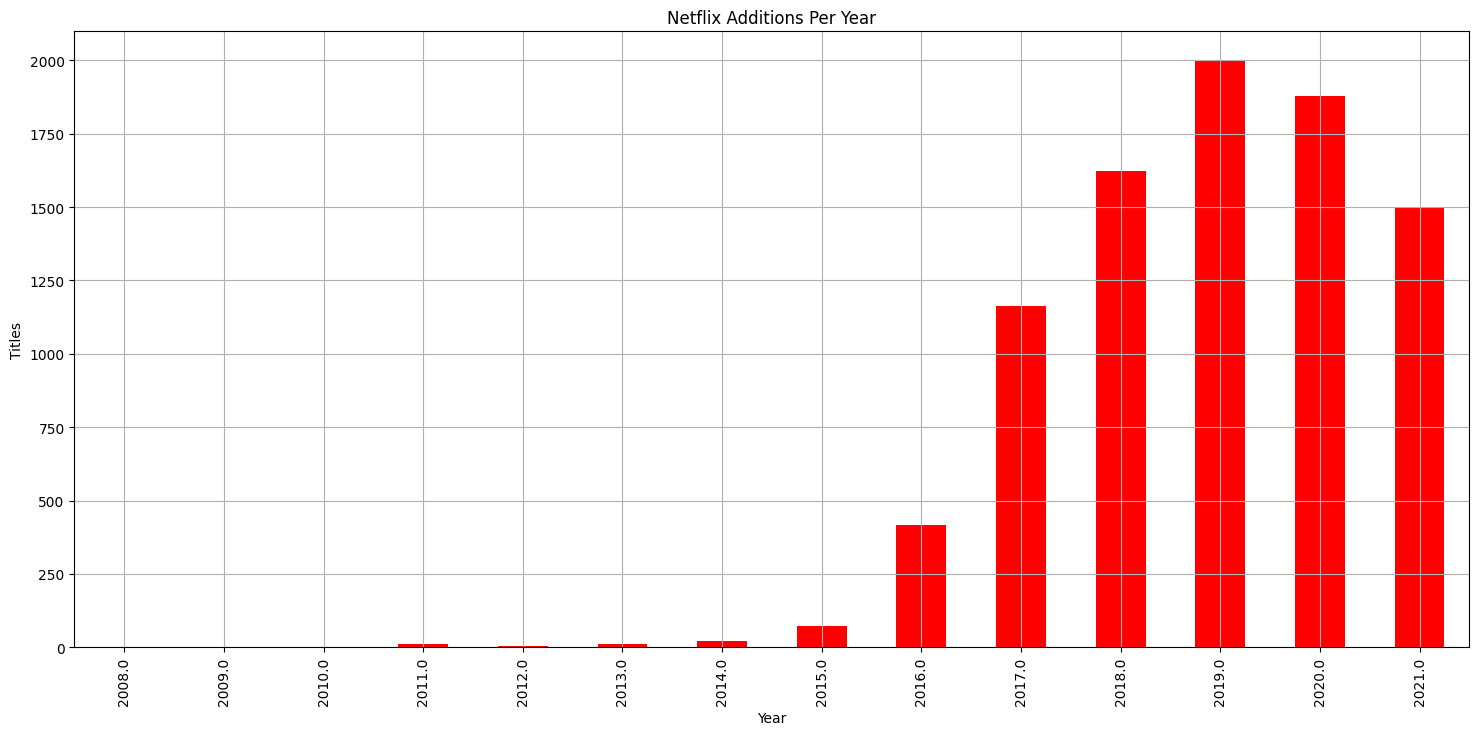

In [17]:
df['year_added'] = pd.to_datetime(df['date_added'], errors='coerce').dt.year
df['year_added'].dropna().value_counts().sort_index().plot(kind='bar',figsize=(18,8), linestyle='--', color='Red')
plt.xlabel('Year')
plt.ylabel('Titles')
plt.title('Netflix Additions Per Year')
plt.grid(True)
plt.show()

#Content Analysis - Part 1:


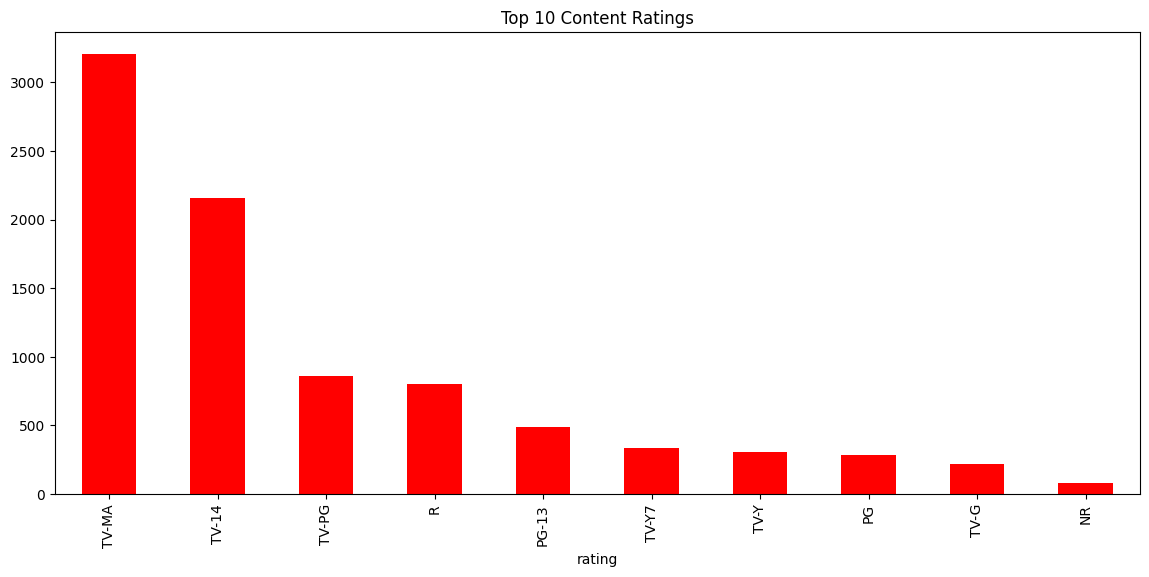

In [18]:
df['rating'].value_counts().head(10).plot(kind='bar',figsize=(14,6),color='Red'); plt.title('Top 10 Content Ratings'); plt.show()

#Content Analysis - Part 2:

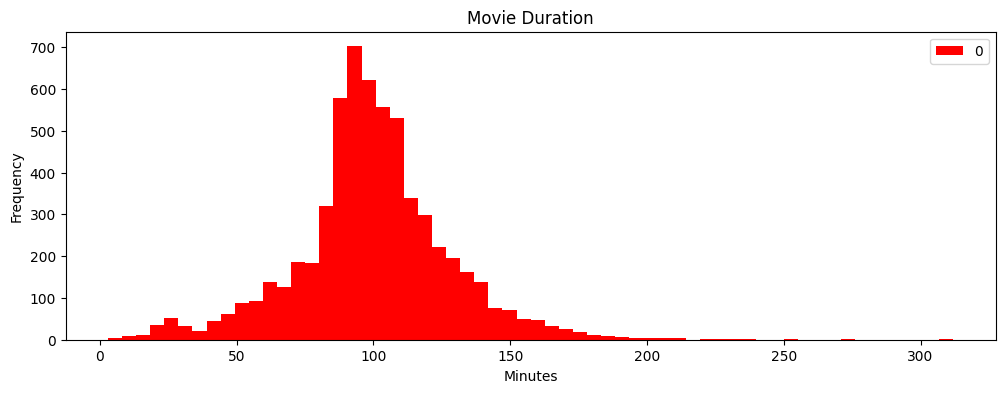

In [19]:
df2 = df[df['type'] == 'Movie']['duration'].str.extract('(\d+)').dropna().astype(int)
df2.plot.hist(bins=60, color='Red', figsize=(12, 4), title='Movie Duration')
plt.xlabel('Minutes')
plt.show()

#Top Lists and Recommendations:

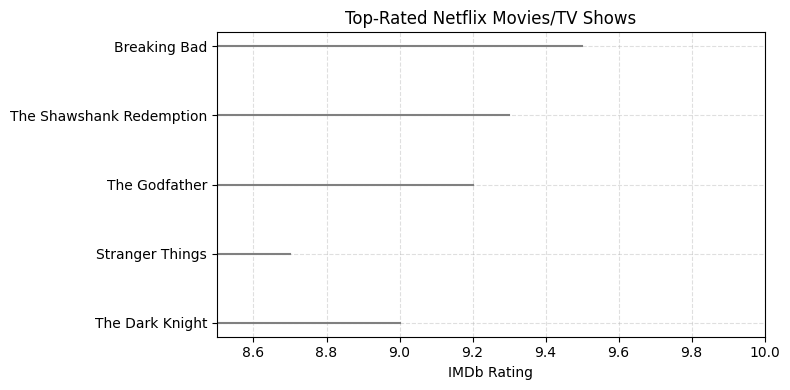

In [33]:
titles = ['Breaking Bad', 'The Shawshank Redemption', 'The Godfather', 'Stranger Things', 'The Dark Knight']
ratings = [9.5, 9.3, 9.2, 8.7, 9.0]
plt.figure(figsize=(8, 4))
[plt.plot([0, r], [t, t], color='gray') or plt.scatter(r, t, color='red', s=100) for t, r in zip(titles, ratings)]
plt.xlabel("IMDb Rating")
plt.title("Top-Rated Netflix Movies/TV Shows")
plt.xlim(8.5, 10)
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

#Genre Trends:


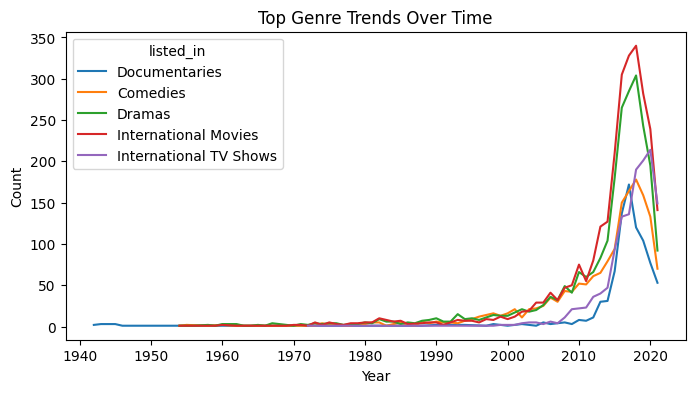

In [27]:
df = pd.read_csv('netflix_titles.csv')
df = df[['release_year', 'listed_in']].dropna()
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

top_genres = df['listed_in'].value_counts().head(5).index
df = df[df['listed_in'].isin(top_genres)]

genre_trend = df.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
plt.figure(figsize=(8,4))
sns.lineplot(data=genre_trend, x='release_year', y='count', hue='listed_in')
plt.title("Top Genre Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

#Geographical Analysis:


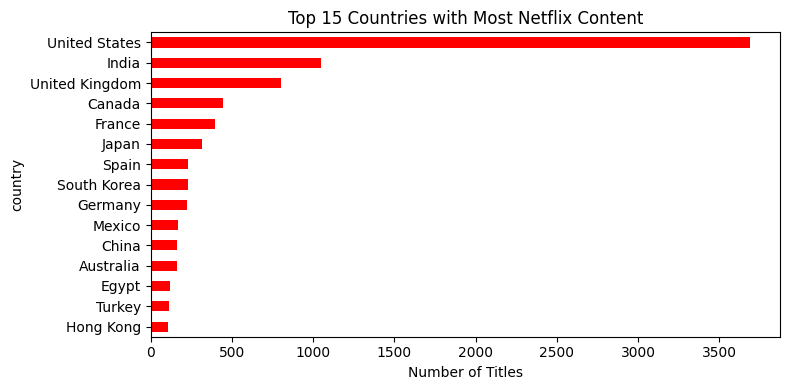

In [26]:
df = pd.read_csv('netflix_titles.csv')
df = df.dropna(subset=['country'])
df['country'] = df['country'].str.split(', ')
df = df.explode('country')
df['country'] = df['country'].str.strip()
df['country'].value_counts().head(15).plot(kind='barh', figsize=(8,4),color = ('Red'), title='Top 15 Countries with Most Netflix Content')
plt.xlabel('Number of Titles'); plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()

#Correlation Analysis:


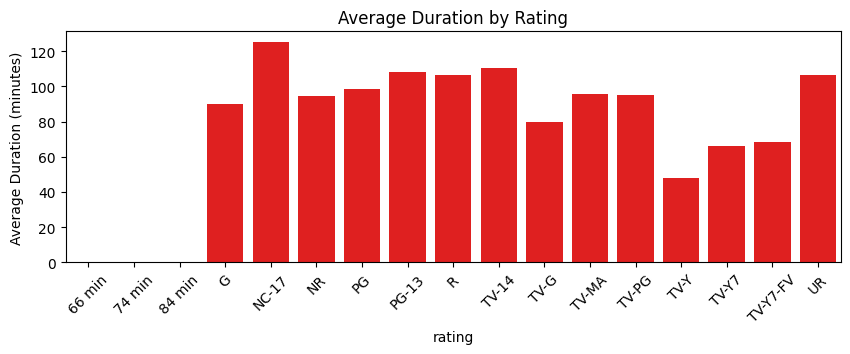

In [25]:
df = pd.read_csv('netflix_titles.csv')
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)
plt.figure(figsize=(10,3))
rating_duration = movies.groupby('rating')['duration'].mean().reset_index()
sns.barplot(data=rating_duration, x='rating', y='duration',color='Red')
plt.title('Average Duration by Rating')
plt.xticks(rotation=45)
plt.ylabel('Average Duration (minutes)')
plt.show()

#Audience Engagement - Part 1:


**"User reviews and sentiments are not available in the provided dataset.**

#Audience Engagement - Part 2:


**Not available in the provided dataset.**



#Content Variety:


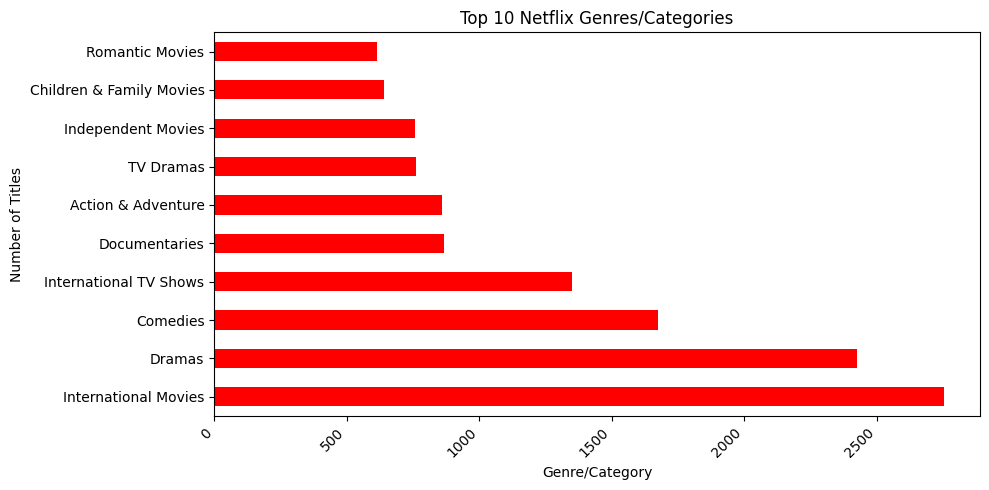

In [22]:
df = df.dropna(subset=['listed_in'])
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10, 5))
top_genres.plot(kind='barh', color='Red')
plt.title('Top 10 Netflix Genres/Categories')
plt.xlabel('Genre/Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Language Analysis:

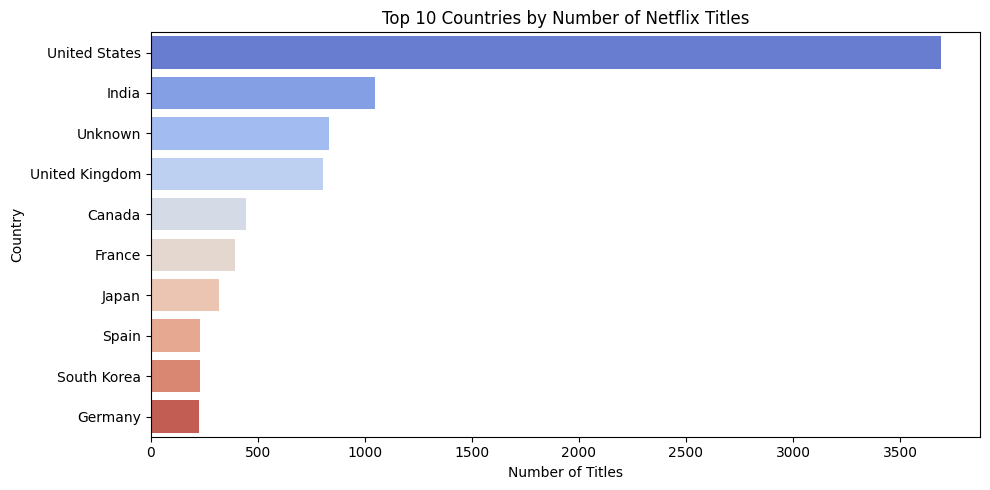

In [23]:
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df['country'] = df['country'].fillna('Unknown').str.split(', ')
df_exploded = df.explode('country')

# Count titles per country (top 10)
top_countries = df_exploded['country'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

#Content Evolution Over Time:

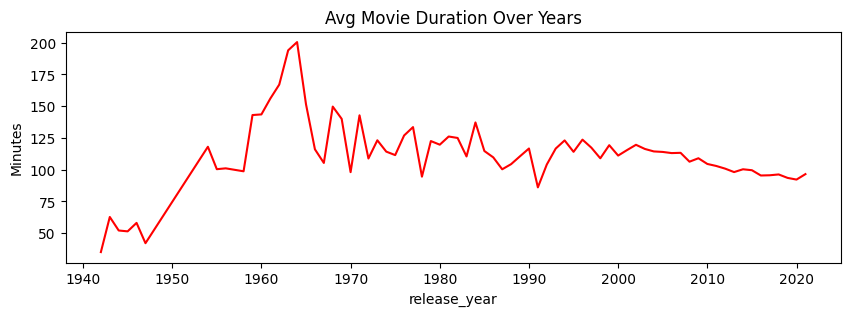

In [24]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False).astype(float)
avg_duration = movies.groupby('release_year')['duration'].mean().reset_index()
plt.figure(figsize=(10, 3))
sns.lineplot(data=avg_duration, x='release_year', y='duration', color='red')
plt.title('Avg Movie Duration Over Years')
plt.ylabel('Minutes')
plt.show()


#User Preferences:

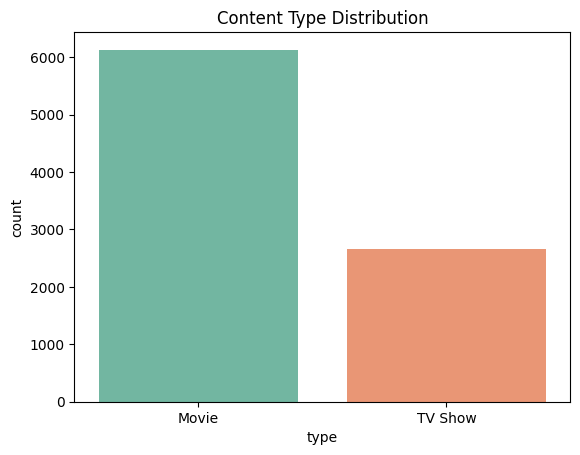

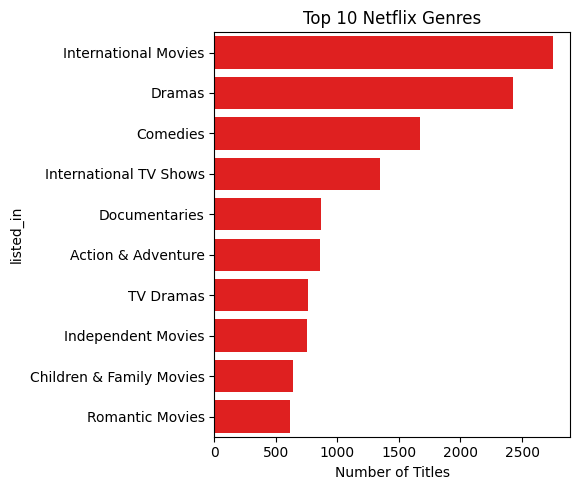

In [21]:
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Content Type Distribution')
plt.show()
df = df.dropna(subset=['listed_in'])
genres = df['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(5.9, 5))
sns.barplot(x=top_genres.values, y=top_genres.index, color='Red')
plt.title('Top 10 Netflix Genres')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

**THANK YOU**